 ## MINST example

This code presents an example to run the test keras environment

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.6'

In [2]:
from keras import layers
from keras import models
import matplotlib.pyplot as plt

Create a Convolutional Neural Network 

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))


## Print model sumary

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
_________________________________________________________________


## Dataset: Load and split 

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(60000, 28, 28)


## Train the network

In [6]:
batch_size = 100
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.1
          )

Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 55s 1ms/step - loss: 0.9685 - acc: 0.7519 - val_loss: 0.2960 - val_acc: 0.9102
Epoch 2/2
54000/54000 [==============================] - 55s 1ms/step - loss: 0.2733 - acc: 0.9191 - val_loss: 0.1769 - val_acc: 0.9507


## Evaluate model data

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 376us/step
('Test loss:', 0.19822668745368718)
('Test accuracy:', 0.9422)


## Present training information

Test loss: 0.19823
Test accuracy: 0.9422


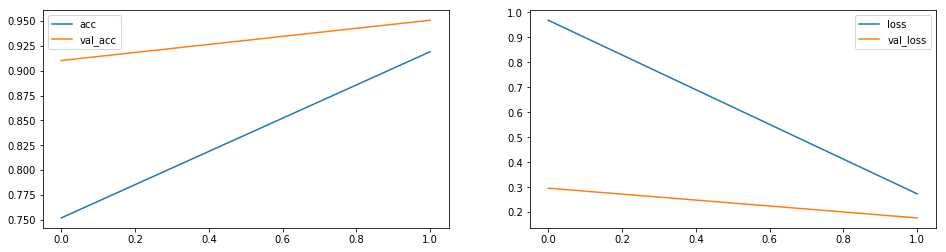

In [26]:
figs, axs = plt.subplots(nrows=1, ncols=2, facecolor='white', figsize=(16,4))
ax=axs[0]
for label in ['acc', 'val_acc']:
    ax.plot(history.epoch, history.history[label], label=label)
ax.legend()

ax=axs[1]
for label in ['loss', 'val_loss']:
    ax.plot(history.epoch,history.history[label], label=label)
ax.legend()

print 'Test loss: %0.5f' % test_loss
print 'Test accuracy:', test_acc